In [3]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp
from datetime import datetime
from pytz import timezone
import os
import scienceplots

plt.style.use(['science','ieee'])

In [4]:
# function to return key for any value
def get_key(my_dict, val):
    for key, value in my_dict.items():
        if val == value:
            return key
 
    return "key doesn't exist"

In [8]:
scenario_name = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                 's15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25']
#short_names={'central_pverde_nocoal_keepgas_RPS_80CO2red':'WECC-connected', 'central_pverde_nocoal_keepgas_RPS_80CO2red_notiex': 'Islanded'}
#order={'WECC-connected':0,  'Islanded':1}
folder_to_save_results="results_v2/"

#Check if the directory exists. If not, then create the directory.
if not os.path.exists(folder_to_save_results):
    os.makedirs(folder_to_save_results)

In [7]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"

In [20]:
# order_cols=[]

# for n in range(0,len(scenario)): #count the number of keys of order dictionary
#     order_cols.append(get_key(order,n))


In [9]:
fname="loads.csv"
loads = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs")
loads.columns= loads.columns.str.lower()
loads

,load_zone,timepoint,zone_demand_mw,scenario
0,AZ_APS_E,88010,255.173,s1
1,AZ_APS_E,88014,230.203,s1
2,AZ_APS_E,88018,204.405,s1
3,AZ_APS_E,88022,263.407,s1
4,AZ_APS_E,88026,263.565,s1
...,...,...,...,...
28795,WY_SW,359143,325.771,s25
28796,WY_SW,359147,277.574,s25
28797,WY_SW,359151,291.759,s25
28798,WY_SW,359155,269.411,s25


In [10]:
fname="timepoints.csv"
timepoints = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs")
timepoints.columns= timepoints .columns.str.lower()
timepoints.rename(columns={'timepoint_id': 'timepoint'}, inplace=True)
timepoints

,timepoint,timestamp,timeseries,scenario
0,88010,2020011602,2020_2020-01-16,s1
1,88014,2020011606,2020_2020-01-16,s1
2,88018,2020011610,2020_2020-01-16,s1
3,88022,2020011614,2020_2020-01-16,s1
4,88026,2020011618,2020_2020-01-16,s1
...,...,...,...,...
571,359143,2050122107,2050_2050-12-21,s25
572,359147,2050122111,2050_2050-12-21,s25
573,359151,2050122115,2050_2050-12-21,s25
574,359155,2050122119,2050_2050-12-21,s25


In [11]:
fname="timeseries.csv"
timeseries = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs")
timeseries.columns= timeseries .columns.str.lower()
timeseries

,timeseries,ts_period,ts_duration_of_tp,ts_num_tps,ts_scale_to_period,scenario
0,2050_2050-01-13,2050,4.0,6,20.2778,s1
1,2050_2050-01-21,2050,4.0,6,283.8889,s1
2,2050_2050-02-22,2050,4.0,6,20.2778,s1
3,2050_2050-02-25,2050,4.0,6,283.8889,s1
4,2050_2050-03-02,2050,4.0,6,20.2778,s1
...,...,...,...,...,...,...
91,2020_2020-10-31,2020,4.0,6,20.2778,s25
92,2020_2020-11-07,2020,4.0,6,283.8889,s25
93,2020_2020-11-29,2020,4.0,6,20.2778,s25
94,2020_2020-12-14,2020,4.0,6,283.8889,s25


In [12]:
fname="periods.csv"
periods = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs")
periods.columns= periods .columns.str.lower()
periods['nyears']=periods['period_end']-periods['period_start']+1
periods.rename(columns={'investment_period': 'ts_period'}, inplace=True)
periods

,ts_period,period_start,period_end,scenario,nyears
0,2020,2016,2025,s1,10
1,2030,2026,2035,s1,10
2,2040,2036,2045,s1,10
3,2050,2046,2055,s1,10
0,2020,2016,2025,s2,10
...,...,...,...,...,...
3,2050,2046,2055,s24,10
0,2020,2016,2025,s25,10
1,2030,2026,2035,s25,10
2,2040,2036,2045,s25,10


In [15]:
state_timezones=pd.read_csv('state_timezones.csv')
state_timezones

,state,timezone,timezone_py
0,AZ,Mountain Standard Time (MST),US/Mountain
1,CA,Pacific Standard Time (PST),US/Pacific
2,CO,Mountain Standard Time (MST),US/Mountain
3,ID,Mountain Standard Time (MST),US/Mountain
4,MT,Mountain Standard Time (MST),US/Mountain
5,NM,Mountain Standard Time (MST),US/Mountain
6,NV,Pacific Standard Time (PST),US/Pacific
7,OR,Pacific Standard Time (PST),US/Pacific
8,UT,Mountain Standard Time (MST),US/Mountain
9,WA,Pacific Standard Time (PST),US/Pacific


In [17]:
load_zones_states=pd.read_csv('load_zones_states.csv')

load_zones_states

,state,timezone,timezone_py,load_zone,load_zone_id
0,CA,Pacific Standard Time (PST),US/Pacific,CA_IID,10
1,CA,Pacific Standard Time (PST),US/Pacific,CA_LADWP,11
2,CA,Pacific Standard Time (PST),US/Pacific,CA_PGE_BAY,12
3,CA,Pacific Standard Time (PST),US/Pacific,CA_PGE_CEN,13
4,CA,Pacific Standard Time (PST),US/Pacific,CA_PGE_N,14
5,CA,Pacific Standard Time (PST),US/Pacific,CA_PGE_S,15
6,CA,Pacific Standard Time (PST),US/Pacific,CA_SCE_CEN,16
7,CA,Pacific Standard Time (PST),US/Pacific,CA_SCE_S,17
8,CA,Pacific Standard Time (PST),US/Pacific,CA_SCE_SE,18
9,CA,Pacific Standard Time (PST),US/Pacific,CA_SCE_VLY,19


In [18]:
#Merge loads with timepoints
loads_1=pd.merge(left=loads,right=timepoints, on=['timepoint', 'scenario'])
#Merge loads_1 with timeseries
loads_2=pd.merge(left=loads_1,right=timeseries, on=['timeseries', 'scenario'])
#Merge loads_2 with periods
loads_3=pd.merge(left=loads_2,right=periods, on=['ts_period', 'scenario'])
#Create a column that reveals the state
loads_4=pd.merge(left=loads_3,right=load_zones_states[['state', 'timezone_py', 'load_zone']], on=['load_zone'])
#Read timestamps and convert to its corresponding timezone
loads_4.loc[:,"timestamp"]=loads_4.apply(lambda x: datetime.strptime(str(x['timestamp']), '%Y%m%d%H'),axis=1)
loads_4.loc[:,"timestamp"]=loads_4.apply(lambda x: x['timestamp'].tz_localize('utc'),axis=1)
loads_4.loc[:,"timestamp"]=loads_4.apply(lambda x: x['timestamp'].tz_convert(x['timezone_py']),axis=1)
#Dropping some useless columns
loads_4.loc[:,'energy_MWh']=loads_4.apply(lambda x: x['zone_demand_mw']*x['ts_duration_of_tp']*x['ts_scale_to_period']/x['nyears'],axis=1)
loads_4.drop(columns=['timepoint', 'timezone_py','timeseries','ts_duration_of_tp', 'ts_num_tps', 'ts_scale_to_period'], inplace=True)
loads_4

,load_zone,zone_demand_mw,scenario,timestamp,ts_period,period_start,period_end,nyears,state,energy_MWh
0,AZ_APS_E,255.173,s1,2020-01-15 19:00:00-07:00,2020,2016,2025,10,AZ_NM,28976.312912
1,AZ_APS_E,230.203,s1,2020-01-15 23:00:00-07:00,2020,2016,2025,10,AZ_NM,26140.830579
2,AZ_APS_E,204.405,s1,2020-01-16 03:00:00-07:00,2020,2016,2025,10,AZ_NM,23211.324242
3,AZ_APS_E,263.407,s1,2020-01-16 07:00:00-07:00,2020,2016,2025,10,AZ_NM,29911.329393
4,AZ_APS_E,263.565,s1,2020-01-16 11:00:00-07:00,2020,2016,2025,10,AZ_NM,29929.271171
...,...,...,...,...,...,...,...,...,...,...
719995,WY_SW,325.771,s25,2050-12-21 00:00:00-07:00,2050,2046,2055,10,WY,2642.367674
719996,WY_SW,277.574,s25,2050-12-21 04:00:00-07:00,2050,2046,2055,10,WY,2251.436023
719997,WY_SW,291.759,s25,2050-12-21 08:00:00-07:00,2050,2046,2055,10,WY,2366.492260
719998,WY_SW,269.411,s25,2050-12-21 12:00:00-07:00,2050,2046,2055,10,WY,2185.224950


In [20]:
#state_analysis=list(loads_4['state'].unique())
load_zone_analysis=['NM_N']
ts_analysis=2035
selected_load=loads_4.copy()
selected_load=selected_load.loc[(selected_load.load_zone.isin(load_zone_analysis)) & (selected_load.ts_period==ts_analysis)]
selected_load.loc[:,'month']=selected_load.apply(lambda x: x['timestamp'].month, axis=1)
#selected_load  = selected_load .replace({"scenario": short_names})
selected_load

ValueError: Expected a 1D array, got an array with shape (0, 10)

In [29]:
monthly_load_by_zone=selected_load.pivot_table(  
    index="month",
    columns='scenario',
    values="energy_MWh",
    aggfunc=np.sum,
)
monthly_load_by_zone=monthly_load_by_zone/10**6

monthly_load_by_zone=monthly_load_by_zone[order_cols]

monthly_load_by_zone

monthly_load_by_zone.to_latex(folder_to_save_results+"Monthly load in PNM"+ ".tex",index=True,
                                  float_format='%.2f',
                                  caption="Monthly load (TWh)")
monthly_load_by_zone

/tmp/ipykernel_3569844/609909968.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  monthly_load_by_zone.to_latex(folder_to_save_results+"Monthly load in PNM"+ ".tex",index=True,


scenario,WECC-connected,Islanded
month,,
1,1.419620,1.419620
2,1.303932,1.303932
3,1.260756,1.260756
4,1.202087,1.202087
5,1.286469,1.286469
6,1.475535,1.475535
7,1.627775,1.627775
8,1.627216,1.627216
9,1.320885,1.320885


In [30]:
monthly_load_by_zone.sum()

scenario
WECC-connected    16.514271
Islanded          16.514271
dtype: float64

In [31]:
m12_ticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']  

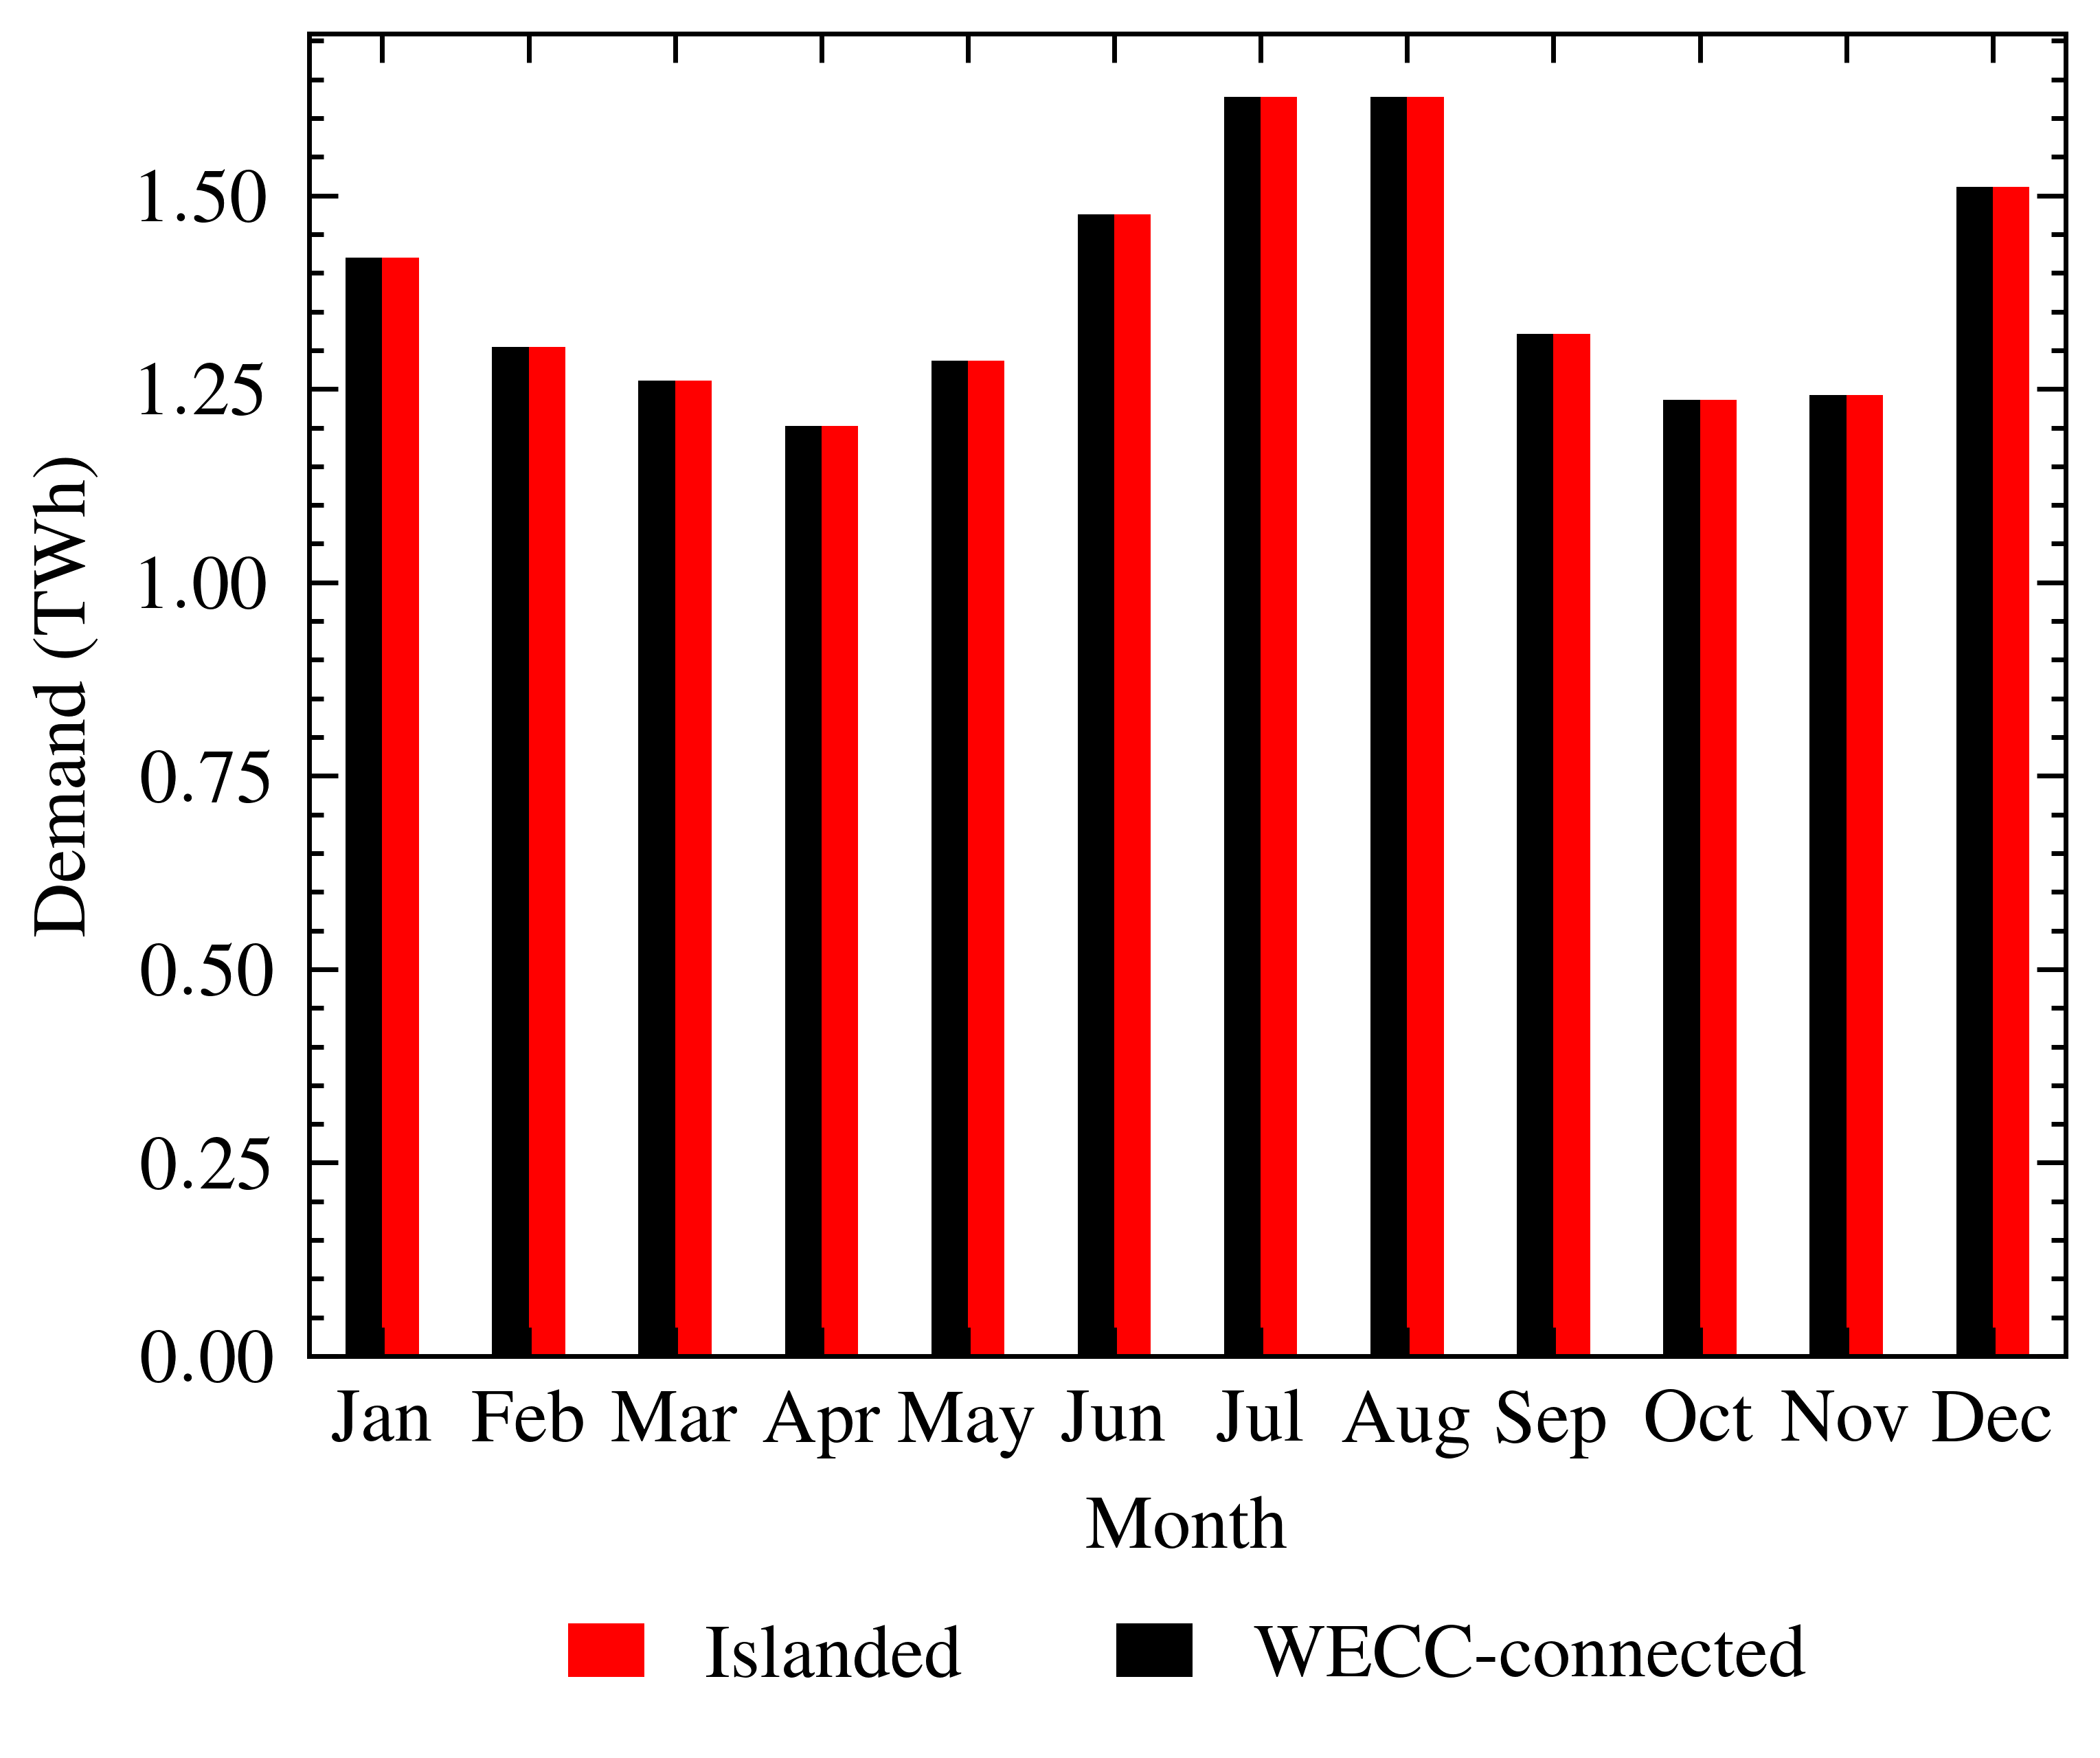

In [32]:
# Initialize figure environment
fig, ax = plt.subplots(dpi=1000)

# Main plot
ax = monthly_load_by_zone.plot(kind='bar', ax=ax)

# Label configuration
plt.xlabel("Month")
ax.set_xticks(np.linspace(0,11,12), m12_ticks,  rotation=0)
plt.ylabel("Demand (TWh)")
ax.xaxis.set_tick_params(which='minor', top=False, bottom=False)
# Legend configuration
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],
    labels[::-1],
    bbox_to_anchor=(0.5, -0.15),
    loc="upper center",
    ncol=3,
    handlelength=1,
    fancybox=True,
    edgecolor="black",
    facecolor="white",
)

plt.savefig(folder_to_save_results+"Load comparison.png", transparent=False)